# Use Case 4: Comparing Mutation Protein Abundance

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


<b>To begin, retrieve protein abudance and somatic gene mutations. The somatic data is represented in binary format: 0 if no mutation is present in the gene, 1 if the mutation is present.</b>

In [3]:
somatic_mutations = CPTAC.get_somatic()
somatic_mutations = CPTAC.somatic_maf
proteomics = CPTAC.get_proteomics()

<b>Next, pick a gene of interest. For this example, we will be using the gene with the highest number of mutations across the samples (using the pandas <code>value_counts()</code> function which returns a descending array of the counts of the unique values in a series). If you already know the name of the gene you can skip this step.</b>

In [4]:
gene = somatic_mutations["Gene"].value_counts().index[0]
print(gene)

PTEN


<b>Once you have found your gene of interest, use the gene to compare somatic and protein abundance utilizing the <code>CPTAC.compare_mutations()</code> function. If you want to be reminded of what gene you are comparing, enter <code>cross.name</code>.</b> 

In [5]:
cross = CPTAC.compare_mutations(proteomics, gene)
cross

,Patient_Id,Mutation,Location,Clinical_Patient_Key,proteomics
14,C3L-00032,Nonsense_Mutation,p.W111*,S003,-1.12
753,C3L-00942,Missense_Mutation,p.A126S,S035,0.17
1213,C3L-00946,Frame_Shift_Ins,p.P248Tfs*5,S036,-0.45
1689,C3L-00949,Missense_Mutation,p.R130G,S038,-0.19
1690,C3L-00949,Frame_Shift_Del,p.K267Rfs*30,S038,-0.19
1716,C3L-01248,Missense_Mutation,p.Y177C,S043,0.23
1717,C3L-01248,Frame_Shift_Del,p.C296*,S043,0.23
1744,C3L-01249,Frame_Shift_Del,p.D51*,S044,-0.85
1977,C3L-01252,Missense_Mutation,p.I122N,S045,0.73
1978,C3L-01252,Frame_Shift_Del,p.K267Rfs*9,S045,0.73


<b>Finally, compare the mutated genes with the non-mutated genes. Plot a boxplot of  protein abundance in mutated against non-mutated.</b>

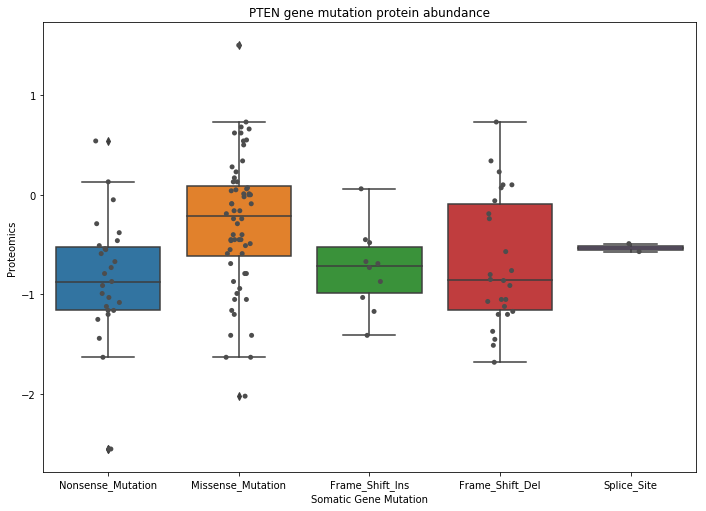

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y="proteomics", ax = ax)
somatic_boxplot.set_title("PTEN gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y="proteomics",jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

<b>We can now compare this plot to the plot of another gene (in this case, CTNNB1)</b>

In [7]:
cross2 = CPTAC.compare_mutations(proteomics, 'CTNNB1')
cross2

,Patient_Id,Mutation,Location,Clinical_Patient_Key,proteomics
993,C3L-00946,Missense_Mutation,p.R453W,S036,0.10
1612,C3L-00947,Missense_Mutation,p.D32N,S037,1.41
1667,C3L-00949,In_Frame_Del,p.S45del,S038,0.41
3111,C3L-01304,Missense_Mutation,p.S37F,S051,0.94
3589,C3L-01311,Missense_Mutation,p.G34E,S053,0.79
8116,C3L-00362,Missense_Mutation,p.D32Y,S017,1.20
10044,C3L-00586,Missense_Mutation,p.K270N,S021,0.78
10045,C3L-00586,Missense_Mutation,p.E334K,S021,0.78
19336,C3L-00601,Missense_Mutation,p.E334K,S022,0.94
22040,C3L-00769,Missense_Mutation,p.D32H,S025,0.24


<b>And plot it the same way</b>

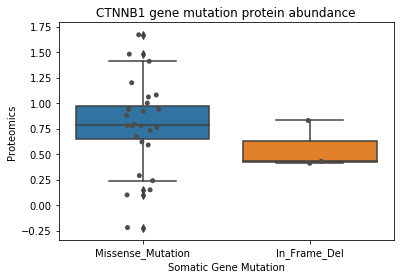

In [8]:
boxplot2 = sns.boxplot(data=cross2, x="Mutation",y="proteomics")
boxplot2.set_title("CTNNB1 gene mutation protein abundance")
boxplot2 = sns.stripplot(data=cross2, x="Mutation",y="proteomics",jitter=True, color=".3")
boxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()